### Plot and analysis of the Sample

In [110]:
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
import pickle
import numpy as np

%matplotlib inline

In [111]:
### Load the pickle
def load_pickle(filein):
    f = open(filein,'r')
    sample = pickle.load(f)
    f.close()
    
    return(sample)


In [112]:
def plot_sample(sample):
    
    ral  = []
    decl = []
    area = []
    colors = []
    
    for gal in sample:
        ral.append(gal['Coord'][0])
        decl.append(gal['Coord'][1])
        area.append(gal['vel'] / 10)
        colors.append(gal['vel'] / 150)
        
          
    ral = np.array(ral)
    decl = np.array(decl)
    
    ra = coord.Angle(ral*u.degree) 
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(decl*u.degree)
    
    ##
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)
    ax.scatter(ra.radian, dec.radian,s=area, c=colors, alpha=0.5)


In [113]:
def filter_photometry(sample, name,valuemin, valuemax):
    "Select a subsample by filtering on the photometry"
    
    subsample = []
    
    for gal in sample:
        for phot in gal['Photometry']:
            if phot[1] == name:
                print phot
                
    return subsample

[]

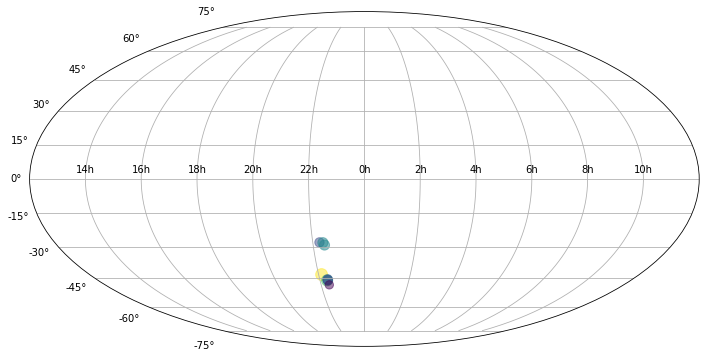

In [114]:
filein = 'sampleGalTest.pkl'
sampleGal = load_pickle(filein)

plot_sample(sampleGal)

## test filter
filter_photometry(sampleGal,"K", 0., 15.)
